In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from tkinter import *


warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r"D:\Major Project\Major Project Dataset (Wine Classification).xlsx")

In [3]:
data = pd.DataFrame(data)

In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data["quality"].unique()

array([5., 6., 7., 4., 8., 3.])

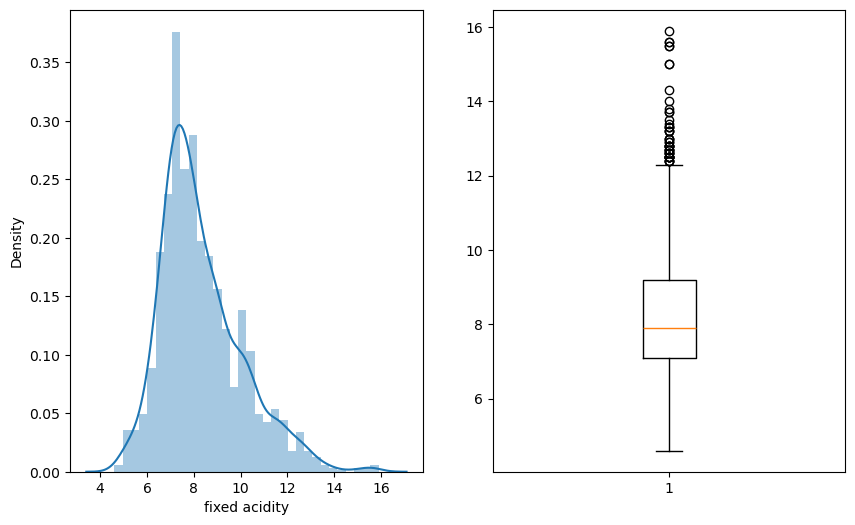

In [10]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(data["fixed acidity"])
plt.subplot(122)
plt.boxplot(data["fixed acidity"])
plt.savefig('Fixed-Quality.png')
plt.show()

In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

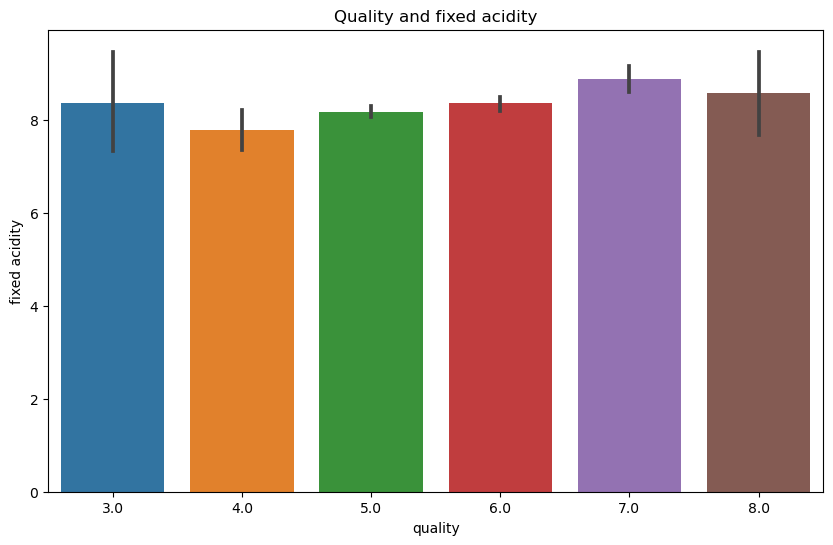

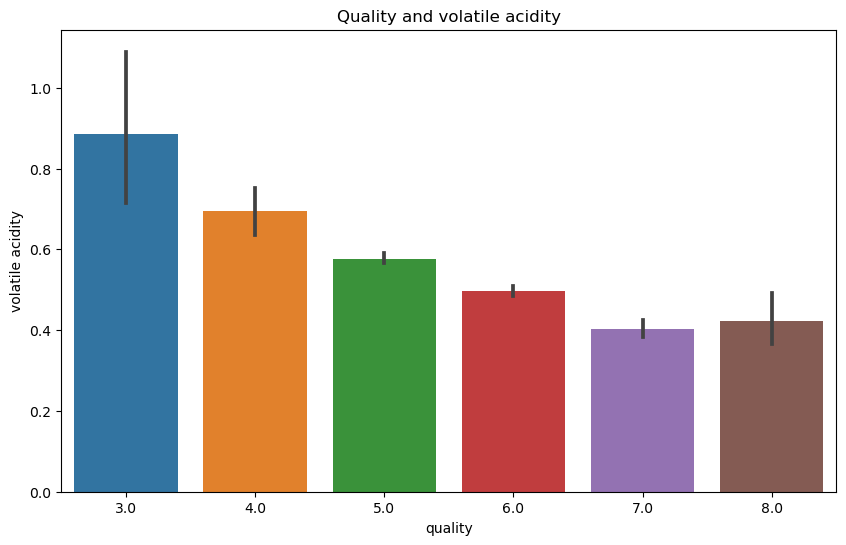

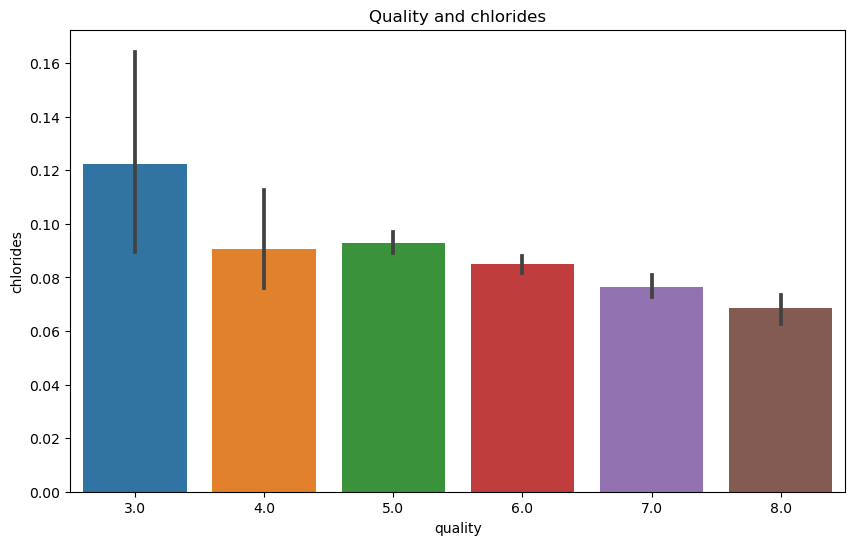

In [12]:
acidity = ['fixed acidity', 'volatile acidity','chlorides']
sugar = ['residual sugar']


def BarGraph(acidity, data):
    for i in acidity:
        plt.figure(figsize=(10,6))
        sns.barplot(x="quality", y=i, data=data)
        plt.title(f"Quality and {i}")
        file_name = f'Quality_{i}.png'
        plt.savefig(file_name)
        plt.show()

BarGraph(acidity, data)

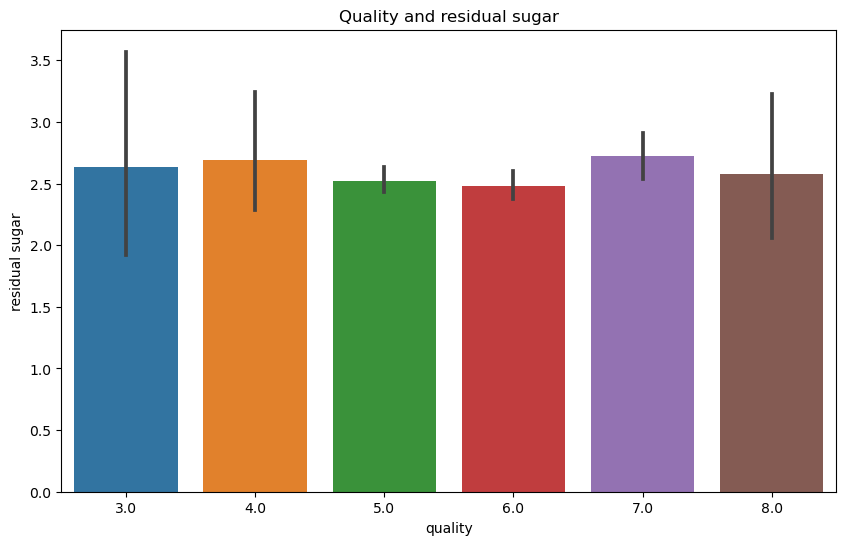

In [13]:
BarGraph(sugar,data)

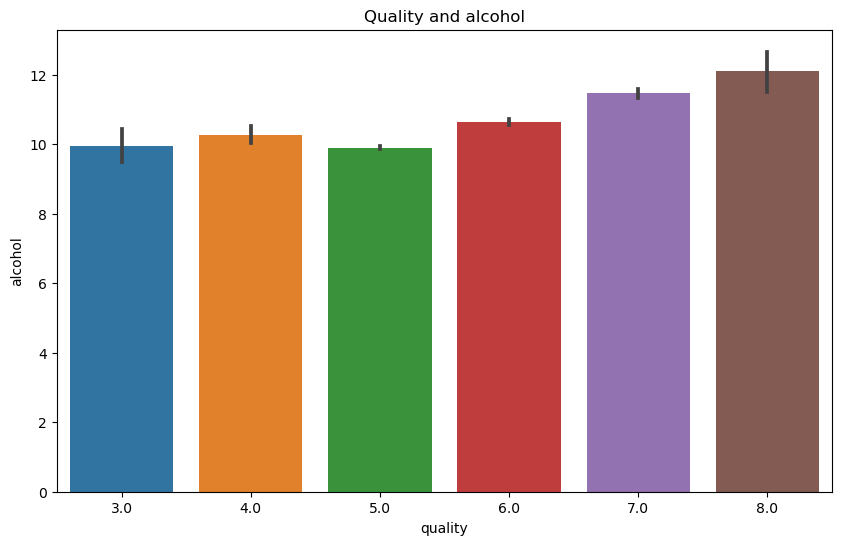

In [14]:
alcohol = ["alcohol"]

BarGraph(alcohol,data)

In [15]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255955,0.672203,0.115542,0.093517,-0.154348,-0.112605,0.668689,0.026958,0.183046,-0.062419,0.124090
volatile acidity,-0.255955,1.000000,-0.552080,0.002286,0.061452,-0.009960,0.076832,0.021761,-0.046243,-0.260504,-0.201591,-0.390616
citric acid,0.672203,-0.552080,1.000000,0.143201,0.203904,-0.061621,0.034873,0.365526,0.008324,0.312146,0.109062,0.226261
residual sugar,0.115542,0.002286,0.143201,1.000000,0.056236,0.187112,0.201120,0.355219,0.043099,0.004105,0.041798,0.015165
chlorides,0.093517,0.061452,0.203904,0.056236,1.000000,0.005456,0.047837,0.200860,-0.259456,0.371510,-0.221472,-0.129172
free sulfur dioxide,-0.154348,-0.009960,-0.061621,0.187112,0.005456,1.000000,0.668505,-0.021797,-0.025512,0.051200,-0.070222,-0.050656
total sulfur dioxide,-0.112605,0.076832,0.034873,0.201120,0.047837,0.668505,1.000000,0.070830,-0.162984,0.042082,-0.205951,-0.184857
density,0.668689,0.021761,0.365526,0.355219,0.200860,-0.021797,0.070830,1.000000,-0.037144,0.148561,-0.496244,-0.174567
pH,0.026958,-0.046243,0.008324,0.043099,-0.259456,-0.025512,-0.162984,-0.037144,1.000000,-0.260327,0.233510,0.133216
sulphates,0.183046,-0.260504,0.312146,0.004105,0.371510,0.051200,0.042082,0.148561,-0.260327,1.000000,0.092940,0.251798


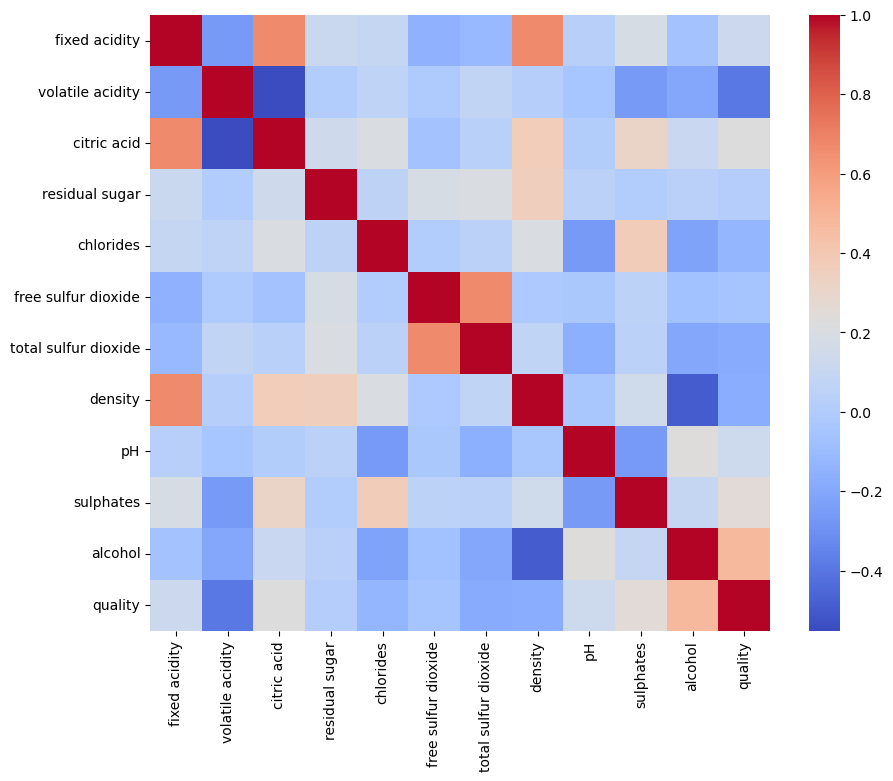

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap="coolwarm")
plt.savefig('data-corr.png')


In [17]:
data["quality"].unique()

array([5., 6., 7., 4., 8., 3.])

In [18]:
data["quality"].isnull().sum()

0

In [19]:
data["quality"]=[1 if x>=7 else 0 for x in data["quality"] ]

In [20]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,0


In [21]:
data["quality"].value_counts()

quality
0    1379
1     217
Name: count, dtype: int64

In [22]:
X = data.drop("quality",axis=1)
y = data["quality"]

# handle the inbalanced data

In [23]:
from imblearn.over_sampling import SMOTE

X_res , y_res = SMOTE().fit_resample(X,y)

y_res.value_counts()

quality
0    1379
1    1379
Name: count, dtype: int64

# Splitting the dataset into the Training Set and Test Set

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X_res , y_res, test_size=0.20, random_state=42)

# Feature Scaling

In [25]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [26]:
X_train

array([[-0.77625647, -0.93584221,  0.06577586, ...,  0.22697476,
        -0.66047092,  0.8704824 ],
       [ 2.23948288,  0.50615856,  0.89665864, ...,  0.22697476,
         1.10600538, -0.00668583],
       [-0.46686211,  0.62379543, -1.59654851, ...,  0.22697476,
        -0.88646438, -0.35868921],
       ...,
       [-0.74877305,  0.0356111 , -1.28489762, ...,  0.22697476,
        -0.11518577,  0.2573167 ],
       [-0.74877305,  0.32970326, -0.92130491, ...,  0.22697476,
        -0.56509829,  1.0493243 ],
       [-0.74877305,  0.85906915, -1.33683943, ...,  0.22697476,
        -1.07928404, -1.06269596]])

# Applying PCA

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

sum(pca.explained_variance_ratio_)

0.905873987442307

# Logistic Regression

In [28]:
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)


LogisticRegression()

In [29]:
y_pred1 = model_1.predict(X_test)

In [30]:
def Prediction_score(y_test,prediction_model,name:str):
    model_accuracy = accuracy_score(y_test,prediction_model)
    model_precision = precision_score(y_test,prediction_model)
    model_recall = recall_score(y_test,prediction_model)
    model_f1 = f1_score(y_test,prediction_model)
    print(f"{name}\n model_accuracy - {model_accuracy}\n model_precision - {model_precision}\n model_recall - {model_recall}\n model_f1 - { model_f1}  ")
    

In [31]:
Prediction_score(y_test,y_pred1,"LogisticRegression")

LogisticRegression
 model_accuracy - 0.802536231884058
 model_precision - 0.7839721254355401
 model_recall - 0.8272058823529411
 model_f1 - 0.8050089445438282  


#  Support Vector Classification

In [32]:
svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

In [33]:
y_pred2 = svc.predict(X_test)

In [34]:
def Prediction_score(y_test,prediction_model,name:str):
    model_accuracy = accuracy_score(y_test,prediction_model)
    model_precision = precision_score(y_test,prediction_model)
    model_recall = recall_score(y_test,prediction_model)
    model_f1 = f1_score(y_test,prediction_model)
    print(f"{name}\n model_accuracy - {model_accuracy}\n model_precision - {model_precision}\n model_recall - {model_recall}\n model_f1 - { model_f1}  ")

In [35]:
Prediction_score(y_test, y_pred2 , "Support Vector Classification")

Support Vector Classification
 model_accuracy - 0.842391304347826
 model_precision - 0.8013029315960912
 model_recall - 0.9044117647058824
 model_f1 - 0.8497409326424871  


# KNeighbors Classifier

In [36]:
model_3 = KNeighborsClassifier()

In [37]:
model_3.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred3 = model_3.predict(X_test)

In [39]:
def Prediction_score(y_test,prediction_model,name:str):
    model_accuracy = accuracy_score(y_test,prediction_model)
    model_precision = precision_score(y_test,prediction_model)
    model_recall = recall_score(y_test,prediction_model)
    model_f1 = f1_score(y_test,prediction_model)
    print(f"{name}\n model_accuracy - {model_accuracy}\n model_precision - {model_precision}\n model_recall - {model_recall}\n model_f1 - { model_f1}  ")

In [40]:
Prediction_score(y_test, y_pred3 , "KNeighbors Classifier")

KNeighbors Classifier
 model_accuracy - 0.8641304347826086
 model_precision - 0.8012232415902141
 model_recall - 0.9632352941176471
 model_f1 - 0.8747913188647747  


# Decision Tree Classifier

In [41]:
model_4 = DecisionTreeClassifier()

In [42]:
model_4.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred4 = model_4.predict(X_test)

In [44]:
def Prediction_score(y_test,prediction_model,name:str):
    model_accuracy = accuracy_score(y_test,prediction_model)
    model_precision = precision_score(y_test,prediction_model)
    model_recall = recall_score(y_test,prediction_model)
    model_f1 = f1_score(y_test,prediction_model)
    print(f"{name}\n model_accuracy - {model_accuracy}\n model_precision - {model_precision}\n model_recall - {model_recall}\n model_f1 - { model_f1}  ")

In [45]:
Prediction_score(y_test, y_pred4 , "Decision Tree Classifier")

Decision Tree Classifier
 model_accuracy - 0.8641304347826086
 model_precision - 0.8530465949820788
 model_recall - 0.875
 model_f1 - 0.8638838475499093  


# Random Forest Classifier

In [46]:
model_5 = RandomForestClassifier()

In [47]:
model_5.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred5 = model_5.predict(X_test)

In [49]:
def Prediction_score(y_test,prediction_model,name:str):
    model_accuracy = accuracy_score(y_test,prediction_model)
    model_precision = precision_score(y_test,prediction_model)
    model_recall = recall_score(y_test,prediction_model)
    model_f1 = f1_score(y_test,prediction_model)
    print(f"{name}\n model_accuracy - {model_accuracy}\n model_precision - {model_precision}\n model_recall - {model_recall}\n model_f1 - { model_f1}  ")

In [50]:
Prediction_score(y_test, y_pred5 , "Random Forest Classifier")

Random Forest Classifier
 model_accuracy - 0.8985507246376812
 model_precision - 0.8648648648648649
 model_recall - 0.9411764705882353
 model_f1 - 0.9014084507042254  


# Gradient Boosting Classifier

In [51]:
model_6 = GradientBoostingClassifier()

In [52]:
model_6.fit(X_train,y_train)

GradientBoostingClassifier()

In [53]:
y_pred6 = model_6.predict(X_test)

In [54]:
def Prediction_score(y_test,prediction_model,name:str):
    model_accuracy = accuracy_score(y_test,prediction_model)
    model_precision = precision_score(y_test,prediction_model)
    model_recall = recall_score(y_test,prediction_model)
    model_f1 = f1_score(y_test,prediction_model)
    print(f"{name}\n model_accuracy - {model_accuracy}\n model_precision - {model_precision}\n model_recall - {model_recall}\n model_f1 - { model_f1}  ")

In [55]:
Prediction_score(y_test, y_pred6 , "Gradient Boosting Classifier")

Gradient Boosting Classifier
 model_accuracy - 0.8677536231884058
 model_precision - 0.8372881355932204
 model_recall - 0.9080882352941176
 model_f1 - 0.8712522045855379  


In [56]:
models_data = pd.DataFrame({
    "Models": ["LR","SVC","KNN","DT","RF","GBC"],
    "Accuracy": [accuracy_score(y_test,y_pred1)*100,
                 accuracy_score(y_test,y_pred2)*100,
                 accuracy_score(y_test,y_pred3)*100,
                 accuracy_score(y_test,y_pred4)*100,
                 accuracy_score(y_test,y_pred5)*100,
                 accuracy_score(y_test,y_pred6)*100,
                ]
})

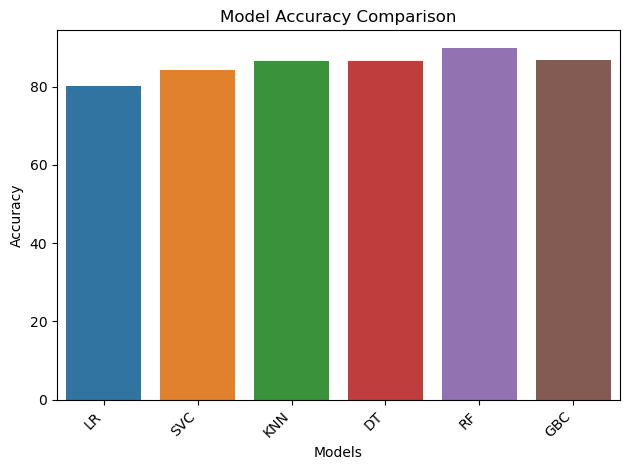

In [57]:
sns.barplot(x=models_data["Models"], y=models_data["Accuracy"])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha="right")
plt.savefig('models_performance.png')
plt.tight_layout()
plt.show()

In [58]:
models_data.to_csv(r"D:\Major Project\Model_Scores.csv", index=False)

# Save Model

In [59]:
X = data.drop("quality",axis=1)
y = data["quality"]

from imblearn.over_sampling import SMOTE
X_res , y_res = SMOTE().fit_resample(X,y)

st = StandardScaler()
X = st.fit_transform(X_res)

X = pca.fit_transform(X)

In [60]:
rf = RandomForestClassifier()

In [61]:
rf.fit(X,y_res)

RandomForestClassifier()

In [62]:
joblib.dump(rf,"Wine_Quality_Prediction")

['Wine_Quality_Prediction']

In [63]:
model = joblib.load('Wine_Quality_Prediction')

# Prediction on New Data

In [64]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [65]:
new_data = pd.DataFrame({
    'fixed acidity' : 7.3,
    'volatile acidity' : 0.65,
    'citric acid' : 0.00, 
    'residual sugar': 1.2,
       'chlorides': 0.065,
    'free sulfur dioxide': 15.0,
    'total sulfur dioxide': 21.0,
    'density': 0.9946,
    'pH': 3.39, 
    'sulphates': 0.47,
       'alcohol' : 10.0
},index=[0])

In [66]:
new_data 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [67]:
test = pca.transform(st.transform(new_data))

In [68]:
predict = model.predict(test)

In [69]:
if predict[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine


# from the dataset try to predict

In [70]:
data = data.drop("quality",axis=1)

In [71]:
prediction_data = data

In [72]:
prediction_test = pca.transform(st.transform(prediction_data))
predict_dataset = model.predict(prediction_test)


for i, prediction in enumerate(predict_dataset):
    if prediction == 1:
        prediction_data.at[i, "result"] = "Good Quality Wine"
    else:
        prediction_data.at[i, "result"] = "Bad Quality Wine"


In [73]:
prediction_data.to_csv(r"D:\Major Project\Wine_Quality_Prediction.csv")

In [74]:
prediction_data["result"].value_counts()

result
Bad Quality Wine     1379
Good Quality Wine     217
nan                     3
Name: count, dtype: int64

# Now get the input Value from the User

In [77]:
from tkinter import *
import joblib  

root = Tk()

def Get_input_Entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    model = joblib.load("wine_quality_prediction")

    prediction_data = [[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11]]
    prediction_test = pca.transform(st.transform(prediction_data))
    result = model.predict(prediction_test)
    
    if result[0] == 1:
        
        result_label.config(text="Prediction: Good wine")
    else:
        result_label.config(text="Prediction: Bad wine")

Label(root, text="fixed acidity").grid(row=1, column=0)
Label(root, text="volatile acidity").grid(row=2, column=0)
Label(root, text="citric acid").grid(row=3, column=0)
Label(root, text="residual sugar").grid(row=4, column=0)
Label(root, text="chlorides").grid(row=5, column=0)
Label(root, text="free sulfur dioxide").grid(row=6, column=0)
Label(root, text="total sulfur dioxide").grid(row=7, column=0)
Label(root, text="density").grid(row=8, column=0)
Label(root, text="pH").grid(row=9, column=0)
Label(root, text="sulphates").grid(row=10, column=0)
Label(root, text="alcohol").grid(row=11, column=0)

e1 = Entry(root)
e2 = Entry(root)
e3 = Entry(root)
e4 = Entry(root)
e5 = Entry(root)
e6 = Entry(root)
e7 = Entry(root)
e8 = Entry(root)
e9 = Entry(root)
e10 = Entry(root)
e11 = Entry(root)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)

button = Button(root, text="Get Prediction", command=Get_input_Entry_fields)
button.grid(row=12, column=0, columnspan=2)


result_label = Label(root, text="")
result_label.grid(row=13, column=0, columnspan=2)

root.mainloop()

